# Pytest and the test coverage


## What's a coverage ?

**coverage** is a **measure**  
used to describe the degree to which  
the source code of a program is **executed**  
when the program **runs**.


## Principles

When a program performs,
* **monitor** the python runtime with a probe
* **track** every executed instructions, called functions and so on
* **compare** effectively used code parts to available parts

This is the **coverage**.

Example with :

```python
import sys

name = sys.argv[1]

result  = name
if 'a' in name:
  result = result[::-1]
if 'z' in name:
  result = ''.join([c for indice,c in enumerate(result) if indice %2 ==0])
if 'x' in name:
  result = result.upper()

print(name,'->',result)
```

When it run..

```bash
$ python coverage_sample.py foo
foo -> foo
```

```bash
$ python coverage_sample.py cat
cat -> tac
```

```bash
$ python coverage_sample.py zoology
zoology -> zooy
```

```bash
$ python coverage_sample.py azterix
azterix -> XRTA
```

```bash
$ python coverage_sample.py foo
foo -> foo
```

* 10 statements
* 7 performed (green)
* 3 missed (red)

<center>70%</center>

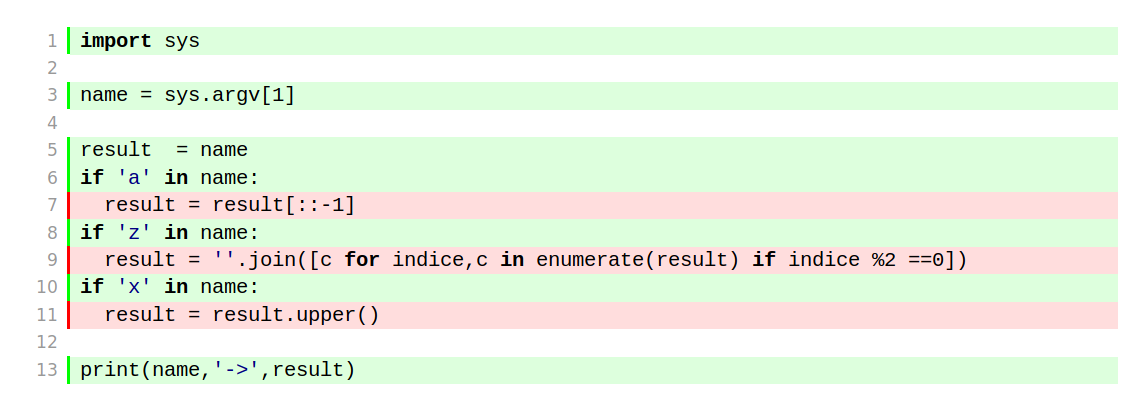

```bash
$ python coverage_sample.py cat
cat -> tac
```

* 10 statements
* 8 performed (green)
* 2 missed (red)
<center>80%</center>

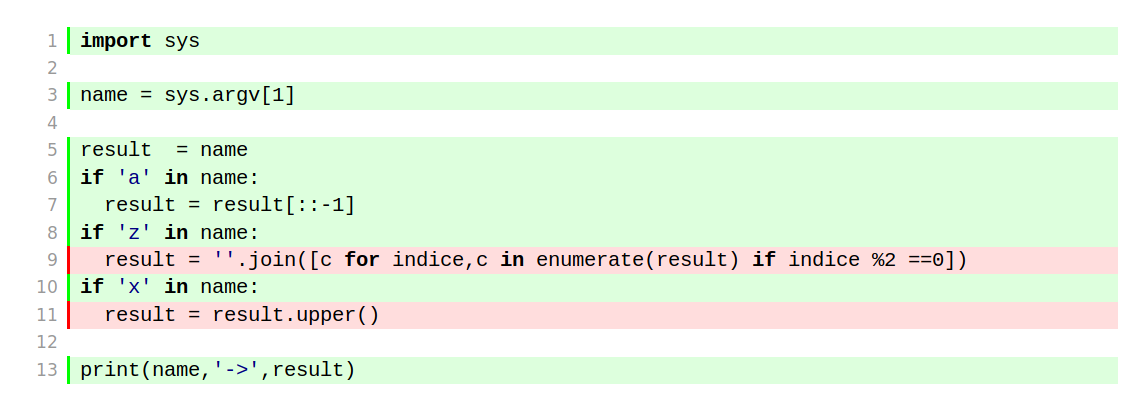

```bash
$ python coverage_sample.py azterix
azterix -> XRTA
```

* 10 statements
* 10 performed (green)
* 0 missed (red)
<center>100%</center>

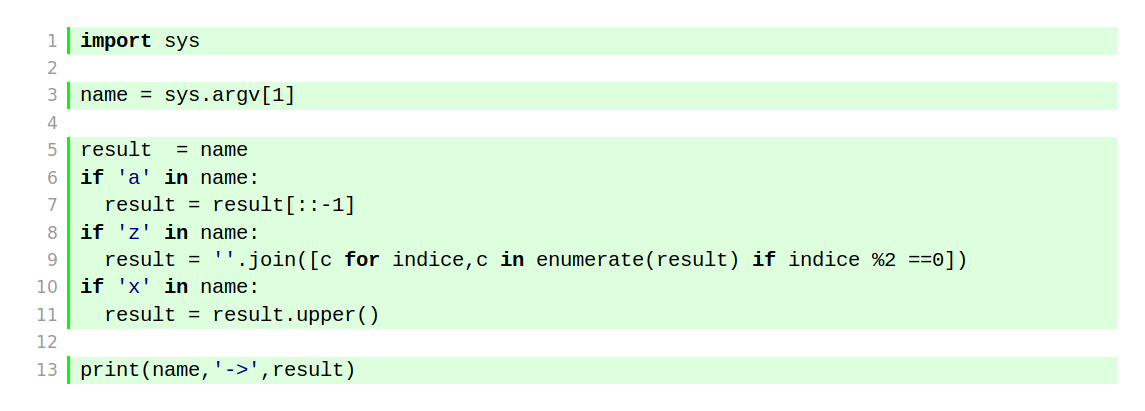

You get it

# Illustration with the Coverage library

[Coverage](https://coverage.readthedocs.io) is a **general** tool and **powerfull** for measuring code coverage of Python programs. 

Coverage 
* monitors your program
* tracks part of executed code, 
* maps to the source code
* identifies code that could have been executed but was not.

Basic usage is

* Run the program
```bash
$ coverage run my_program.py
```
* This feeds a `.coverage` file
* Report (reads the `.coverage` file)
```bash
$ coverage report
```


```bash
$ coverage report
Name                      Stmts   Miss  Cover
---------------------------------------------
my_program.py                20      4    80%
my_module.py                 15      2    86%
my_other_module.py           56      6    89%
---------------------------------------------
TOTAL                        91     12    87%
```

Report as html
```bash
$ coverage html
$ firefox htmlcov/index.html
```

Please take a look at the <a href="https://nedbatchelder.com/files/sample_coverage_html/index.html" target="_blank">official sample</a>

See reporting options https://coverage.readthedocs.io/en/latest/cmd.html#reporting

```python
def foo(a,b):
    if a > b:
    	c = 2*a
    elif a == b:
    	c = a*a
    elif a and b:
    	c = a+b
    else:
    	c = 2 * min(a,b)
    return c
```

```python
from foo import foo

foo(2,5)
```

```bash
$ coverage run run_foo.py
```

<center>
<img src="images/coverage_wo_branch.png">
</center>

## Branch 

By default, `coverage` measures only statements (instruction) executions.

It can also measure ***branch coverage***.

So you could see the flow control (*if then else*) coverage.





```bash
$ coverage run --branch run_foo.py
```

<center>
<img src="images/coverage_branch.png">
</center>

# Test coverage

**Test coverage** is a **measure**  
used to describe the degree to which  
the source code of a program is **executed**  
when a particular **test suite runs**.

<div style="text-align: right;">Wikipedia</div>

By example:

```python
def foo(a,b):
    if a > b:
    	c = 2*a
    elif a == b:
    	c = a*a
    elif a and b:
    	c = a+b
    else:
    	c = 2 * min(a,b)
    return c
```

```python
from foo import foo

def test_foo_a_eq_b():
	a=1
	b=1
	assert foo(a,b) == 1
```


<img src="images/coverage_foo_missed.png">

<img src="images/coverage_foo_run.png">

Let's increase the code coverage

```python
def foo(a,b):
    if a > b:
    	c = 2*a
    elif a == b:
    	c = a*a
    elif a and b:
    	c = a+b
    else:
    	c = 2 * min(a,b)
    return c
```

```python
from foo import foo

def test_foo_a_eq_b():
	assert foo(1,1) == 1

def test_foo_a_gt_b():
	assert foo(2,1) == 4	
```

<img src="images/coverage_foo_missed_2.png">

<img src="images/coverage_foo_run_2.png">

These examples are obtained with

```bash
$ coverage run --source=./ -m pytest
$ coverage html
```

But there more simple...

# pytest-cov

A pytest plugin combining the best of `pytest` and `coverage`: [pytest-cov](https://pytest-cov.readthedocs.io/en/latest/)

```bash
$ pytest --cov=my_project/ --cov-report html
```

# Some ideas to keep in mind with coverage

<div style="text-align: center;">
    Coverage is <b>necessary</b>
</div>

<div style="text-align: center;">
    ... but <span style="font-size: larger"><b>not sufficient</b></span> at all.
</div>

## Coverage measures surface but not rightness

You could pass by all the statements and branches and be **wrong** !

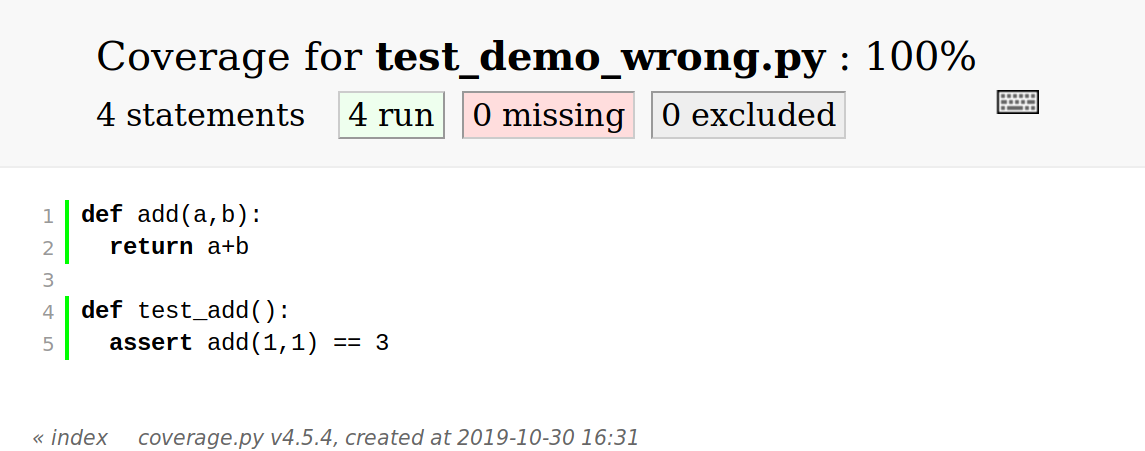

Be sure the test is relevant **then** check you got a good coverage.

## Coverage is an indicator, not a goal to reach

* Trying to reach a 100% coverage is **expensive** and **useless**
* ***But*** a poor coverage is an indicator of poor testing
   * 20% is very poor
   * 50% is just ok
   * 70% is good
   

As for unit tests:

* Get a good coverage on **important** or **complicated** parts
* Don't try to get coverage on boilerplate parts of code

```python
class Foo:
    def set_x(self,x): # useless to cover
        self.x=x
        
    def set_y(self,y): # useless to cover
        self.y=y
    
    # important to cover
    def distance_from_origin(self):
        return sqrt(self.x*self.x + self.y*self.y)
```

## Combine converage with another indicators

Use coverage in combination of other quality tools as

* [Radon](https://radon.readthedocs.io/en/latest/index.html)

## Conclusion about the test coverage

* You can run coverage out of test, just to understand which parts are used
* It's a necessary but not sufficient measure
* Use pytest-cov
* Put it in your development workflow